In [ ]:
from sklearn.model_selection import train_test_split
from transformers import T5Tokenizer

In [ ]:
import os
import pandas as pd


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [ ]:

def read_all_data(base_dir='full'):
    all_dfs = []

    # Iterate through each category directory
    for category in os.listdir(base_dir):
        category_dir = os.path.join(base_dir, category, 'chunks')
        if os.path.isdir(category_dir):
            # Iterate through each CSV file in the chunks subdirectory
            for file_name in os.listdir(category_dir):
                if file_name.endswith('.csv'):
                    file_path = os.path.join(category_dir, file_name)
                    df = pd.read_csv(file_path)
                    all_dfs.append(df)

    # Concatenate all DataFrames into one
    combined_df = pd.concat(all_dfs, ignore_index=True)

    return combined_df

# Use the function to read all data into one DataFrame
combined_df = read_all_data()



In [ ]:
combined_df

,paper_id,title,abstract,year,primary_category,categories,primary_category_full,cleaned_full_text,cleaned_abstract
0,2208.09568v1,Probabilities of Causation with Nonbinary Trea...,This paper deals with the problem of estimatin...,2022-08-19 23:54:47+00:00,cs.AI,cs.AI,Artificial Intelligence,Probabilities of Causation with Nonbinary Trea...,This paper deals with the problem of estimatin...
1,2208.09558v1,Personalized Decision Making -- A Conceptual I...,Personalized decision making targets the behav...,2022-08-19 22:21:29+00:00,cs.AI,cs.AI cs.LO,Artificial Intelligence,arXiv:2208.09558v1 19 Aug 2022 Personalized D...,Personalized decision making targets the behav...
2,2208.09554v1,Evaluating Diverse Knowledge Sources for Onlin...,Online autonomous agents are able to draw on a...,2022-08-19 21:53:15+00:00,cs.AI,cs.AI,Artificial Intelligence,Evaluating Diverse Knowledge Sources for Onlin...,Online autonomous agents are able to draw on a...
3,2208.09344v1,Positive dependence in qualitative probabilist...,Qualitative probabilistic networks (QPNs) comb...,2022-08-19 13:53:04+00:00,cs.AI,cs.AI,Artificial Intelligence,arXiv:2208.09344v1 19 Aug 2022 Positive depen...,Qualitative probabilistic networks combine th...
4,2208.09292v3,UnCommonSense: Informative Negative Knowledge ...,Commonsense knowledge about everyday concepts ...,2022-09-05 07:02:33+00:00,cs.AI,cs.AI cs.IR,Artificial Intelligence,UnCommonSense: Informative Negative Knowledge ...,Commonsense knowledge about everyday concepts ...
...,...,...,...,...,...,...,...,...,...
14807,1512.00727v2,TinyLFU: A Highly Efficient Cache Admission Po...,This paper proposes to use a frequency based c...,2015-12-03 10:38:11+00:00,cs.OS,cs.OS,Operating Systems,TinyLFU: A Highly Eﬃcient Cache Admission Poli...,This paper proposes to use a frequency based c...
14808,1511.02498v1,Characteristic specific prioritized dynamic av...,CPU scheduling is one of the most crucial oper...,2015-11-08 15:44:59+00:00,cs.OS,cs.OS,Operating Systems,"International Journal of Computer Science, Eng...",CPU scheduling is one of the most crucial oper...
14809,1510.05567v2,Energy-Efficient Scheduling for Homogeneous Mu...,"We present a number of novel algorithms, based...",2015-11-12 12:16:11+00:00,cs.OS,cs.OS cs.SY,Operating Systems,"5 1 0 2 v o N 2 1 ] S O . s c . Thus, a dynami...","We present a number of novel algorithms, based..."
14810,1510.02552v1,Multitasking Programming of OBDH Satellite Bas...,On Board Data Handling (OBDH) has functions to...,2015-10-09 02:58:40+00:00,cs.OS,cs.OS,Operating Systems,Aug. 31 International Journal of advanced stud...,On Board Data Handling has functions to monit...


In [ ]:
# Display the combined DataFrame
print(combined_df.head())
print(combined_df.info())

       paper_id                                              title  \
0  2208.09568v1  Probabilities of Causation with Nonbinary Trea...   
1  2208.09558v1  Personalized Decision Making -- A Conceptual I...   
2  2208.09554v1  Evaluating Diverse Knowledge Sources for Onlin...   
3  2208.09344v1  Positive dependence in qualitative probabilist...   
4  2208.09292v3  UnCommonSense: Informative Negative Knowledge ...   

                                            abstract  \
0  This paper deals with the problem of estimatin...   
1  Personalized decision making targets the behav...   
2  Online autonomous agents are able to draw on a...   
3  Qualitative probabilistic networks (QPNs) comb...   
4  Commonsense knowledge about everyday concepts ...   

                        year primary_category   categories  \
0  2022-08-19 23:54:47+00:00            cs.AI        cs.AI   
1  2022-08-19 22:21:29+00:00            cs.AI  cs.AI cs.LO   
2  2022-08-19 21:53:15+00:00            cs.AI        cs.

In [ ]:
# Check for missing values
print(combined_df.isnull().sum())

# Ensure that the necessary columns are present
expected_columns = ['paper_id', 'abstract', 'cleaned_full_text', 'cleaned_abstract', 'category']
missing_columns = set(expected_columns) - set(combined_df.columns)
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All expected columns are present.")

# Sample some rows to ensure data is correctly formatted
print(combined_df.sample(5))


paper_id                   0
title                      0
abstract                   0
year                       0
primary_category           0
categories                 0
primary_category_full      0
cleaned_full_text        903
cleaned_abstract           0
dtype: int64
Missing columns: {'category'}
           paper_id                                              title  \
5929      0101011v1       Multiple-Size Divide-and-Conquer Recurrences   
13693  2007.02735v3  LFQ: Online Learning of Per-flow Queuing Polic...   
9483   2207.09057v1  An Intelligent Trust Cloud Management Method f...   
2401   2008.06727v3  A Review on Drivers Red Light Running Behavior...   
14492  1911.12419v1  A Framework for Weighted-Sum Energy Efficiency...   

                                                abstract  \
5929   This short note reports a master theorem on ti...   
13693  The increasing number of different, incompatib...   
9483   5G edge computing enabled Internet of Medical ...   
2401   Red 

In [ ]:
# Adding the category column based on primary_category_full or primary_category
combined_df['category'] = combined_df['primary_category_full']

# Drop rows with missing cleaned_full_text
cleaned_combined_df = combined_df.dropna(subset=['cleaned_full_text'])


# Display the updated DataFrame
print(cleaned_combined_df.head())
print(cleaned_combined_df.info())

# Verify data integrity again
print(cleaned_combined_df.isnull().sum())
print(cleaned_combined_df.sample(5))

       paper_id                                              title  \
0  2208.09568v1  Probabilities of Causation with Nonbinary Trea...   
1  2208.09558v1  Personalized Decision Making -- A Conceptual I...   
2  2208.09554v1  Evaluating Diverse Knowledge Sources for Onlin...   
3  2208.09344v1  Positive dependence in qualitative probabilist...   
4  2208.09292v3  UnCommonSense: Informative Negative Knowledge ...   

                                            abstract  \
0  This paper deals with the problem of estimatin...   
1  Personalized decision making targets the behav...   
2  Online autonomous agents are able to draw on a...   
3  Qualitative probabilistic networks (QPNs) comb...   
4  Commonsense knowledge about everyday concepts ...   

                        year primary_category   categories  \
0  2022-08-19 23:54:47+00:00            cs.AI        cs.AI   
1  2022-08-19 22:21:29+00:00            cs.AI  cs.AI cs.LO   
2  2022-08-19 21:53:15+00:00            cs.AI        cs.

In [ ]:
# Confirm all expected columns are present
expected_columns = ['paper_id', 'title', 'abstract', 'year', 'primary_category', 'categories', 'primary_category_full', 'cleaned_full_text', 'cleaned_abstract', 'category']
missing_columns = set(expected_columns) - set(cleaned_combined_df.columns)
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All expected columns are present.")

# Check for any remaining missing values
print(cleaned_combined_df.isnull().sum())

# Display summary information
print(cleaned_combined_df.info())
print(cleaned_combined_df.describe(include='all'))

# Sample some rows to verify data integrity
print(cleaned_combined_df.sample(5))


All expected columns are present.
paper_id                 0
title                    0
abstract                 0
year                     0
primary_category         0
categories               0
primary_category_full    0
cleaned_full_text        0
cleaned_abstract         0
category                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13909 entries, 0 to 14811
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   paper_id               13909 non-null  object
 1   title                  13909 non-null  object
 2   abstract               13909 non-null  object
 3   year                   13909 non-null  object
 4   primary_category       13909 non-null  object
 5   categories             13909 non-null  object
 6   primary_category_full  13909 non-null  object
 7   cleaned_full_text      13909 non-null  object
 8   cleaned_abstract       13909 non-null  object
 9   category

In [ ]:
# Save the final DataFrame to a CSV file
cleaned_combined_df.to_csv('final_combined_dataset.csv', index=False, escapechar='\\')


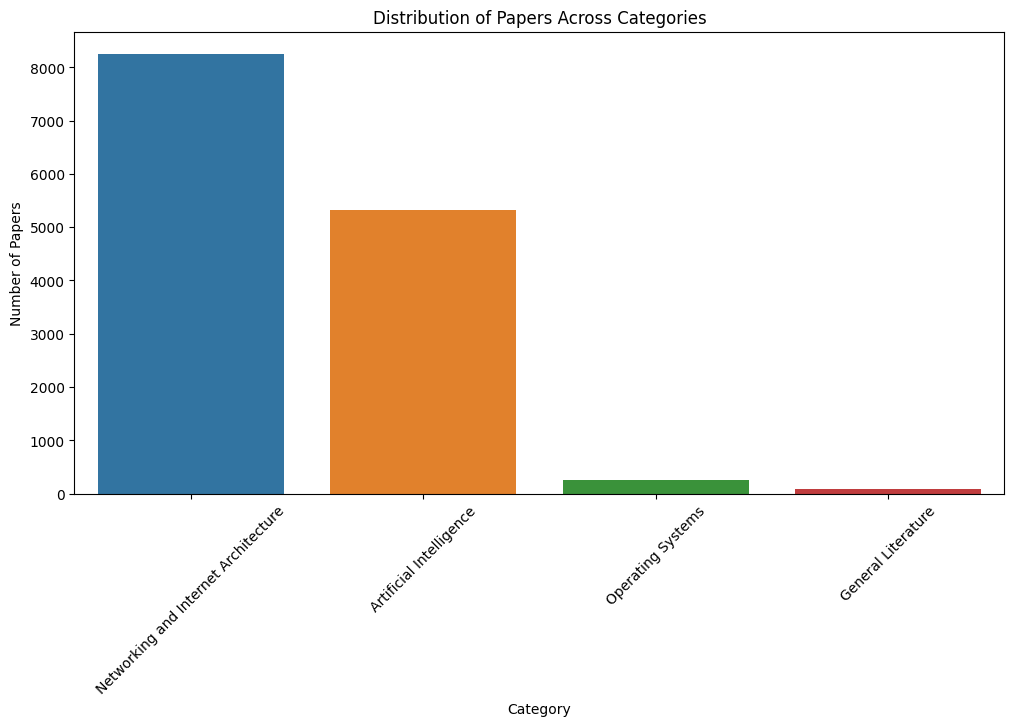

In [ ]:

# Assuming cleaned_combined_df is your DataFrame

# 1. Distribution of Papers Across Categories
plt.figure(figsize=(12, 6))
sns.countplot(data=cleaned_combined_df, x='category', order=cleaned_combined_df['category'].value_counts().index)
plt.title('Distribution of Papers Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.show()



In [ ]:
# 2. Distribution of Text Lengths
def plot_length_distribution(column, title, xlabel):
    plt.figure(figsize=(12, 6))
    text_lengths = cleaned_combined_df[column].apply(lambda x: len(x.split()))
    sns.histplot(text_lengths, bins=50, kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
# 3. Word Clouds
def plot_wordcloud(column, title):
    text = ' '.join(cleaned_combined_df[column])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [ ]:
# 6. Average Length of Full Texts and Abstracts by Category
def plot_average_length_by_category(column, title, ylabel):
    avg_lengths = cleaned_combined_df.groupby('category')[column].apply(lambda x: x.str.split().str.len().mean()).reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(data=avg_lengths, x='category', y=column, order=avg_lengths.sort_values(by=column, ascending=False)['category'])
    plt.title(title)
    plt.xlabel('Category')
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
def plot_boxplot_lengths(column, title, ylabel):
    cleaned_combined_df[f'{column}_length'] = cleaned_combined_df[column].apply(lambda x: len(x.split()))
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=cleaned_combined_df, x='category', y=f'{column}_length')
    plt.title(title)
    plt.xlabel('Category')
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()

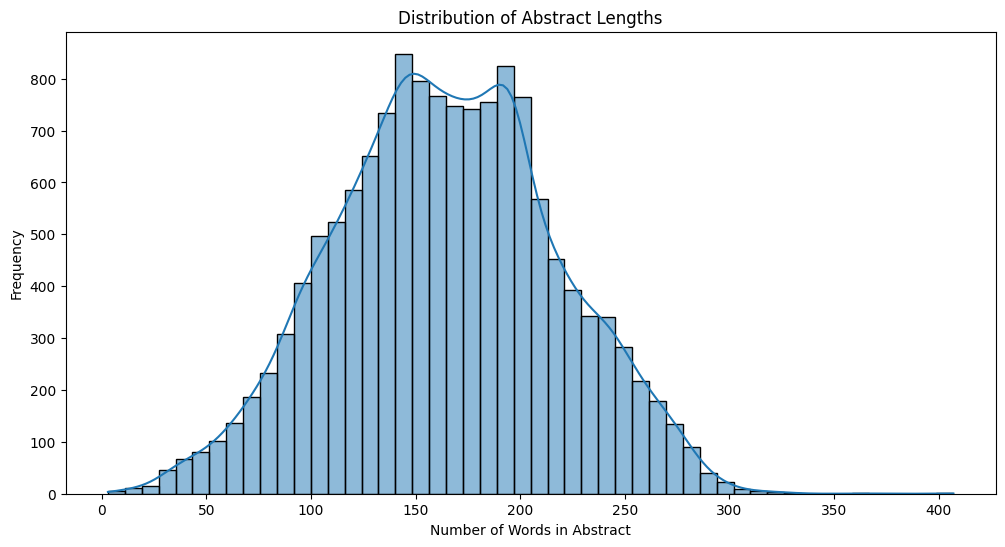

In [ ]:
plot_length_distribution('cleaned_abstract', 'Distribution of Abstract Lengths', 'Number of Words in Abstract')

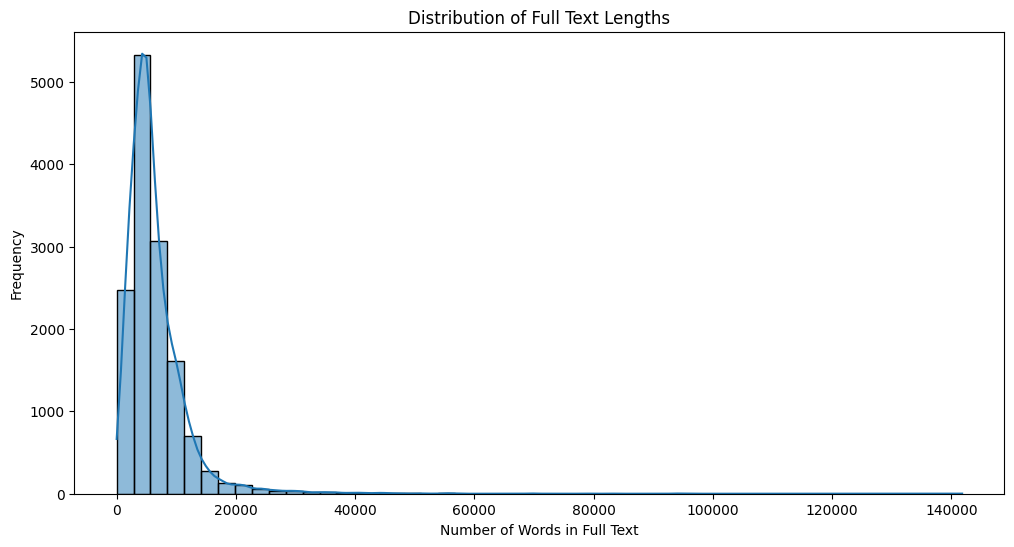

In [ ]:
plot_length_distribution('cleaned_full_text', 'Distribution of Full Text Lengths', 'Number of Words in Full Text')

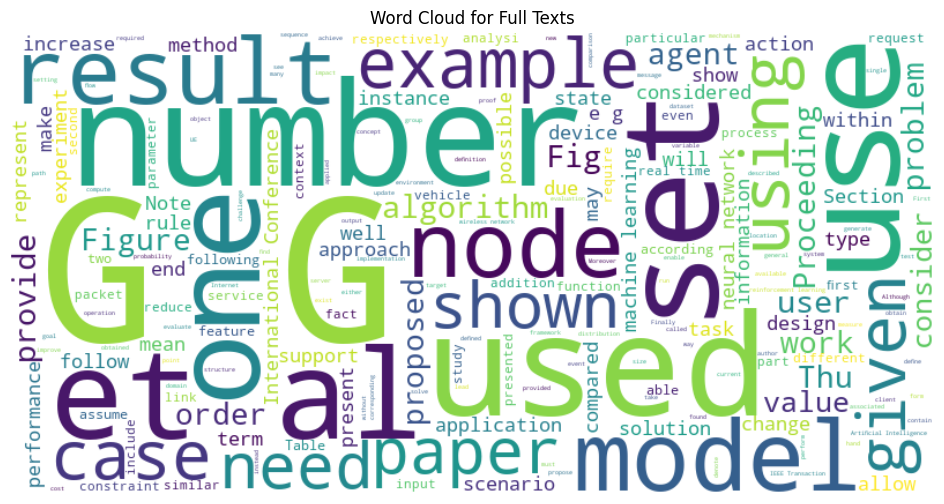

In [ ]:
plot_wordcloud('cleaned_full_text', 'Word Cloud for Full Texts')

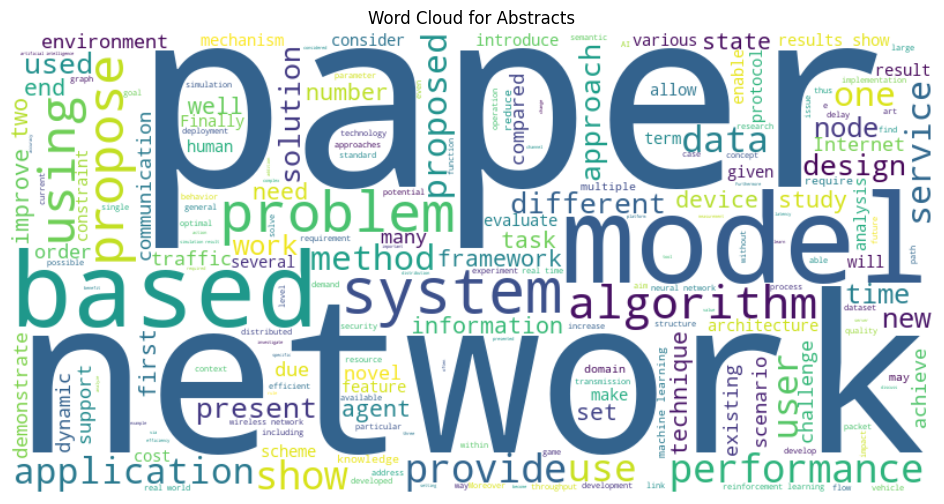

In [ ]:
plot_wordcloud('cleaned_abstract', 'Word Cloud for Abstracts')

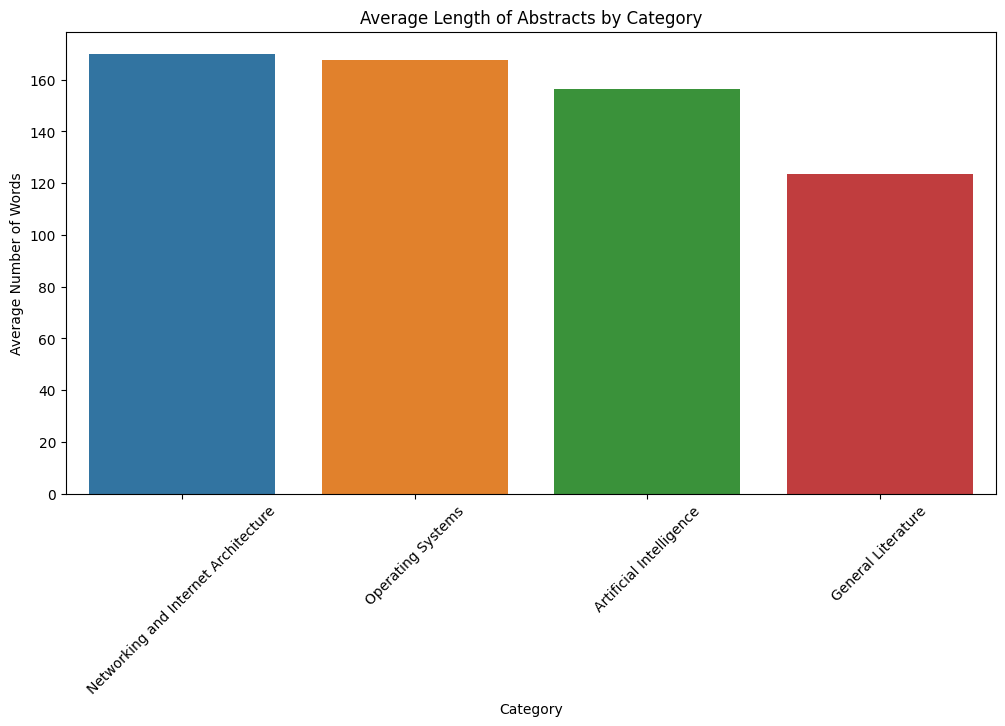

In [ ]:
plot_average_length_by_category('cleaned_abstract', 'Average Length of Abstracts by Category', 'Average Number of Words')

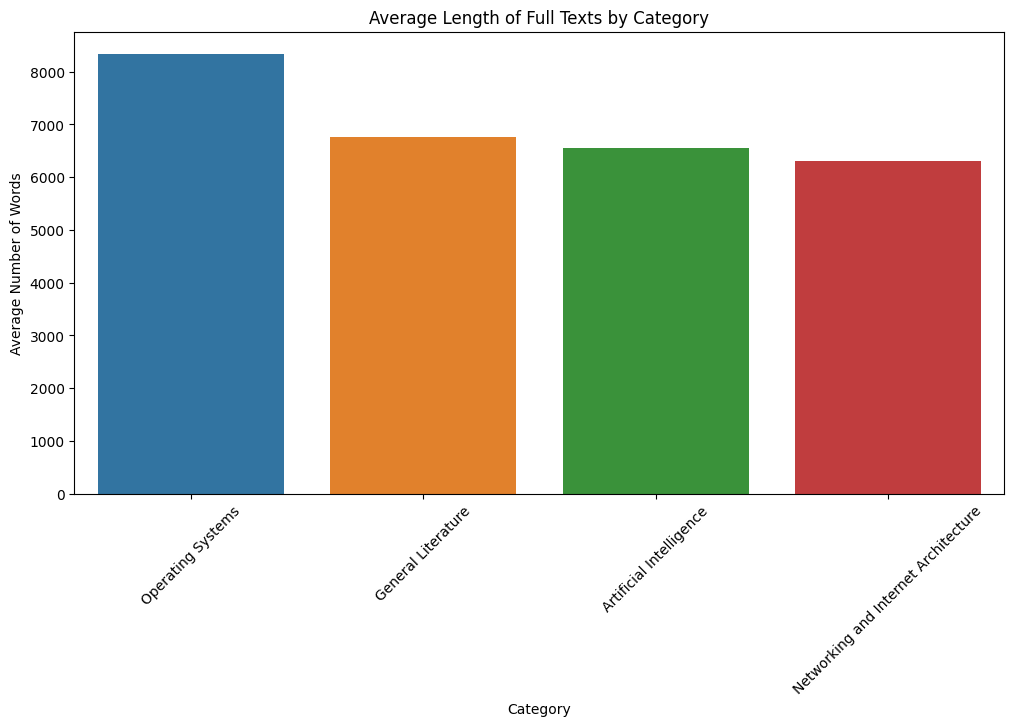

In [ ]:
plot_average_length_by_category('cleaned_full_text', 'Average Length of Full Texts by Category', 'Average Number of Words')


C:\Users\amins\AppData\Local\Temp\ipykernel_16772\3368503711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_combined_df[f'{column}_length'] = cleaned_combined_df[column].apply(lambda x: len(x.split()))


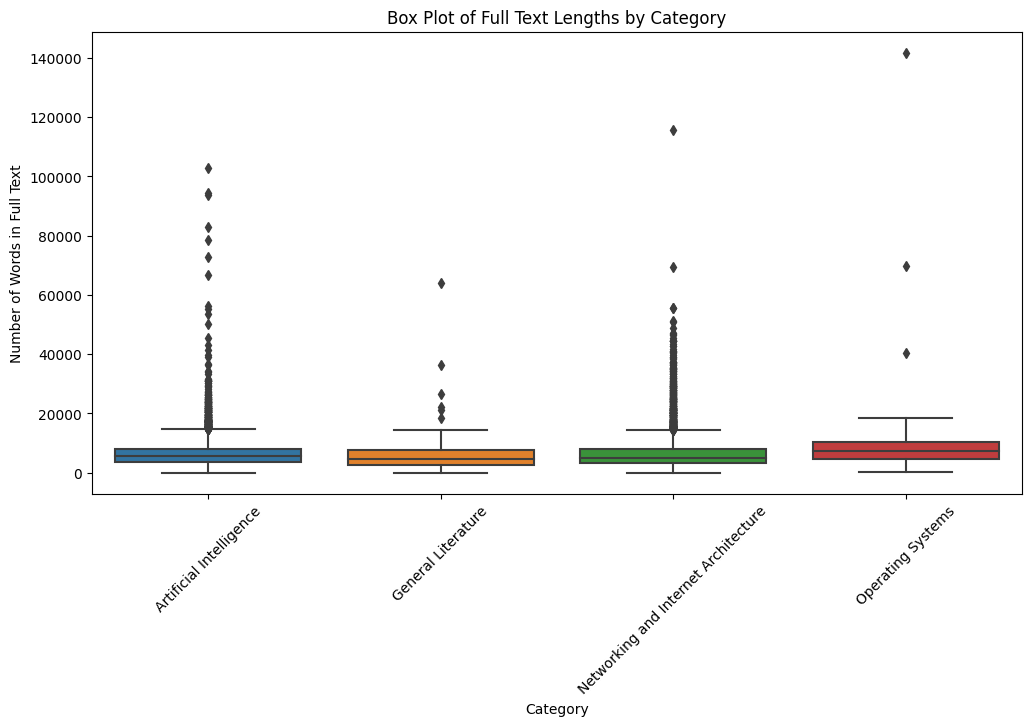

In [ ]:
plot_boxplot_lengths('cleaned_full_text', 'Box Plot of Full Text Lengths by Category', 'Number of Words in Full Text')

C:\Users\amins\AppData\Local\Temp\ipykernel_16772\3368503711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_combined_df[f'{column}_length'] = cleaned_combined_df[column].apply(lambda x: len(x.split()))


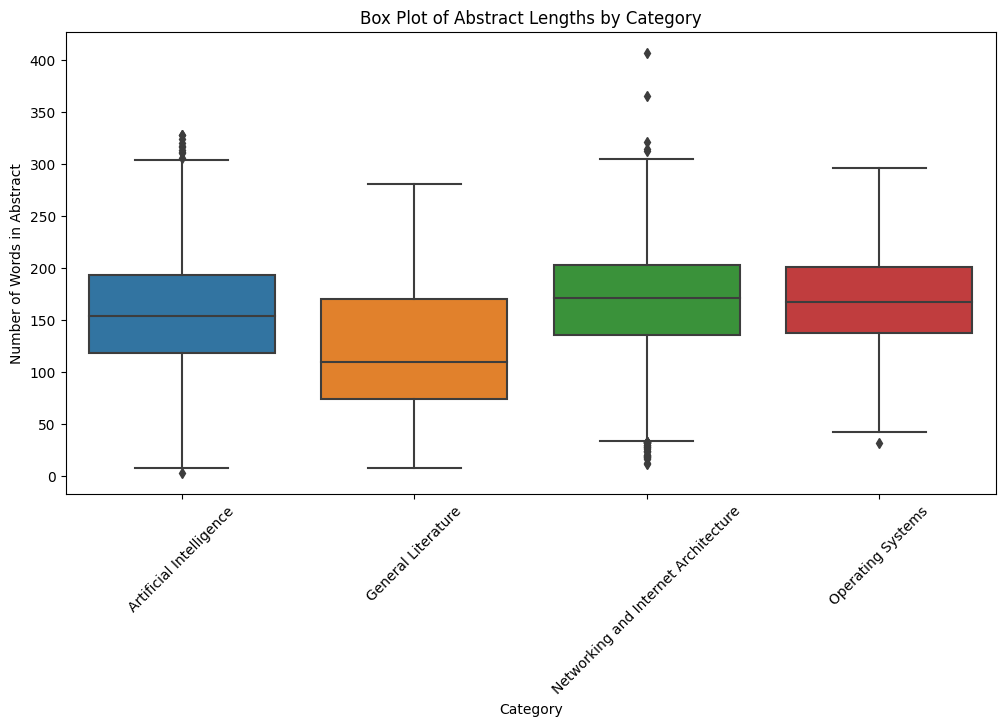

In [ ]:
plot_boxplot_lengths('cleaned_abstract', 'Box Plot of Abstract Lengths by Category', 'Number of Words in Abstract')

In [ ]:
cleaned_combined_df= cleaned_combined_df[cleaned_combined_df["category"] == "Networking and Internet Architecture"]

In [ ]:
# Select 10 papers for case testing
case_test_df = cleaned_combined_df.sample(n=10)


In [ ]:

# Display the selected papers for case testing
case_test_df


,paper_id,title,abstract,year,primary_category,categories,primary_category_full,cleaned_full_text,cleaned_abstract,category,cleaned_full_text_length,cleaned_abstract_length
6954,1901.09357v1,End-to-End Performance Analysis of Underwater ...,On the contrary of low speed and high delay ac...,2019-01-27 11:51:14+00:00,cs.NI,cs.NI cs.SY,Networking and Internet Architecture,End-to-End Performance Analysis of Underwater ...,On the contrary of low speed and high delay ac...,Networking and Internet Architecture,9962,200
11868,2112.05199v1,"This internet, on the ground",The internet's key points of global control li...,2021-12-09 20:13:50+00:00,cs.NI,cs.NI,Networking and Internet Architecture,"This internet, on the ground Nick Merrill Dece...",The internet's key points of global control li...,Networking and Internet Architecture,9826,82
7751,1806.02704v1,CABaRet: Leveraging Recommendation Systems for...,Joint caching and recommendation has been rece...,2018-06-07 14:32:49+00:00,cs.NI,cs.NI,Networking and Internet Architecture,arXiv:1806.02704v1 7 Jun 2018 CABaRet: Levera...,Joint caching and recommendation has been rece...,Networking and Internet Architecture,4546,156
10902,2209.11675v1,An analysis of the Internet of Things in wirel...,Information may be accessed from a distance th...,2022-09-23 16:03:29+00:00,cs.NI,cs.NI cs.SY,Networking and Internet Architecture,An analysis of the Internet of Things in wirel...,Information may be accessed from a distance th...,Networking and Internet Architecture,4191,160
14301,2001.08847v1,Wirelessly-powered Sensor Networks Power Alloc...,Wirelessly-powered sensor networks (WPSNs) are...,2020-01-23 23:25:50+00:00,cs.NI,cs.NI cs.SY,Networking and Internet Architecture,arXiv:2001.08847v1 23 Jan 2020 1 Wirelessly-p...,Wirelessly-powered sensor networks are becomi...,Networking and Internet Architecture,3771,168
13676,2007.05820v1,Recent Results on Proportional Fair Scheduling...,Millimeter wave (mmWave) communication has rec...,2020-07-11 17:54:16+00:00,cs.NI,cs.NI,Networking and Internet Architecture,Recent Results on Proportional Fair Scheduling...,Millimeter wave communication has recently at...,Networking and Internet Architecture,3784,189
12718,2104.05586v1,Discrete-Time Analysis of Wireless Blockchain ...,Blockchain (BC) technology can revolutionize f...,2021-04-12 15:59:46+00:00,cs.NI,cs.NI,Networking and Internet Architecture,Discrete-Time Analysis of Wireless Blockchain ...,Blockchain technology can revolutionize futur...,Networking and Internet Architecture,3156,138
10799,2210.17203v2,Using Locality-sensitive Hashing for Rendezvou...,The multichannel rendezvous problem is a funda...,2022-11-11 06:00:45+00:00,cs.NI,cs.NI,Networking and Internet Architecture,1 Using Locality-sensitive Hashing for Rendezv...,The multichannel rendezvous problem is a funda...,Networking and Internet Architecture,5448,141
8847,1107.2615v1,Aspects of Entertainment Distribution in an In...,The paper presents an implementation and tests...,2011-07-13 17:47:28+00:00,cs.NI,cs.NI cs.MM,Networking and Internet Architecture,ASPECTS OF ENTERTAINMENT DISTRIBUTION IN AN IN...,The paper presents an implementation and tests...,Networking and Internet Architecture,20,94
7855,1805.03111v1,Modeling and Analysis of MPTCP Proxy-based LTE...,Long Term Evolution (LTE)-Wireless Local Area ...,2018-05-08 15:33:30+00:00,cs.NI,cs.NI,Networking and Internet Architecture,Modeling and Analysis of MPTCP Proxy-based LTE...,Long Term Evolution -Wireless Local Area Netwo...,Networking and Internet Architecture,3995,160


In [ ]:
# Exclude the case test papers from the main dataset
remaining_df = cleaned_combined_df.drop(case_test_df.index)

# Display the size of the remaining dataset
print(f"Remaining dataset: {len(remaining_df)} samples")


Remaining dataset: 8247 samples


In [ ]:
# Save the case test papers to a CSV file for documentation
case_test_df.to_csv('case_test_papers.csv', index=False)

print("Case test papers have been saved to 'case_test_papers.csv'.")


Case test papers have been saved to 'case_test_papers.csv'.


In [ ]:
# Save the case test papers to a CSV file for documentation
remaining_df.to_csv('remaining_papers.csv', index=False)

print("remaining papers have been saved to 'remaining_df.csv'.")


remaining papers have been saved to 'remaining_df.csv'.
